## Feature Selection

In [1]:
#generic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Feature Selection and its Importance

Feature Selection is the process of selecting features which contribute most to our prediction variable or output. Having irrelevant features in our data can decrease the accuracy of machine learning models.

#### Why feature selection is important?

· Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.  
· Improves Accuracy: Less misleading data means modeling accuracy improves.  
· Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

### Introduction to Dataset

The dataset we are going to use was prepared to predict price range for cell phones using the features of the phone. You can learn more about the dataset <a href="https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv" >here</a>.

In [2]:
mobile=pd.read_csv("https://raw.githubusercontent.com/ujwal-sah/my_tutorials/master/Feature%20Engineering/mobile_dataset.csv")
mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


"price_range" is the target variable with a value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [3]:
mobile.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

We will seperate independent and dependent variables as X and y respectively

In [4]:
X=mobile.iloc[:,:-1]
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [5]:
y=mobile['price_range']
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

### Feature selection methods

#### 1. Univariate Selection

In this method we use statistical tests to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the "SelectKBest" model that can be used with a suite of different statistical tests to select a specific number of features. The example below uses the chi-squared (chi²) statistical test for non-negative features to select the best features from the Mobile Price Range Prediction Dataset.

In [6]:
#import
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

We want to see chi2 score for all features instead of (say) top 10 features. So we will use k=20 and note score for each feature.

In [7]:
X.shape

(2000, 20)

In [8]:
#instantiate
features_rank = SelectKBest(score_func=chi2,k=20)
features_rank

SelectKBest(k=20, score_func=<function chi2 at 0x0000023E10173820>)

In [9]:
#fit
features_rank.fit(X,y)

SelectKBest(k=20, score_func=<function chi2 at 0x0000023E10173820>)

In [10]:
#estimate
features_rank.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [11]:
scores_uv=pd.Series(features_rank.scores_, index=X.columns, name="scores_uv")
scores_uv.sort_values(ascending=False)

ram              931267.519053
px_height         17363.569536
battery_power     14129.866576
px_width           9810.586750
mobile_wt            95.972863
int_memory           89.839124
sc_w                 16.480319
talk_time            13.236400
fc                   10.135166
sc_h                  9.614878
pc                    9.186054
n_cores               9.097556
touch_screen          1.928429
four_g                1.521572
m_dep                 0.745820
blue                  0.723232
clock_speed           0.648366
dual_sim              0.631011
wifi                  0.422091
three_g               0.327643
Name: scores_uv, dtype: float64

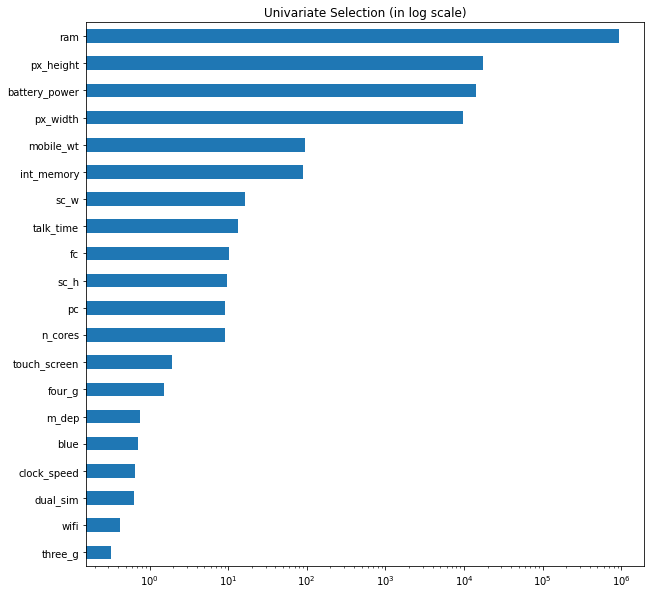

In [12]:
scores_uv.sort_values().plot(kind="barh", figsize=(10,10), title="Univariate Selection (in log scale)", logx=True)

#### 2. Feature Importance

Feature importance is an inbuilt estimator that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features from the dataset. We can get the feature importance of each feature by using the feature importance property of the "ExtraTreesClassifier" model. Feature importance gives a score for each feature, the higher the score more important or relevant is the feature towards the output variable.

In [13]:
#import
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
#instantiate and fit
etc=ExtraTreesClassifier()
etc.fit(X,y)

ExtraTreesClassifier()

In [15]:
#estimate
etc.feature_importances_

array([0.06114607, 0.01991781, 0.03357547, 0.01896332, 0.03256423,
       0.01685203, 0.03433232, 0.03291182, 0.03606883, 0.03261882,
       0.03333042, 0.04716584, 0.04891887, 0.3978794 , 0.03348718,
       0.03371189, 0.03415624, 0.01380128, 0.01860577, 0.01999239])

In [16]:
scores_etc=pd.Series(etc.feature_importances_, index=X.columns, name="scores_etc")
scores_etc.sort_values(ascending=False)

ram              0.397879
battery_power    0.061146
px_width         0.048919
px_height        0.047166
mobile_wt        0.036069
int_memory       0.034332
talk_time        0.034156
sc_w             0.033712
clock_speed      0.033575
sc_h             0.033487
pc               0.033330
m_dep            0.032912
n_cores          0.032619
fc               0.032564
wifi             0.019992
blue             0.019918
dual_sim         0.018963
touch_screen     0.018606
four_g           0.016852
three_g          0.013801
Name: scores_etc, dtype: float64

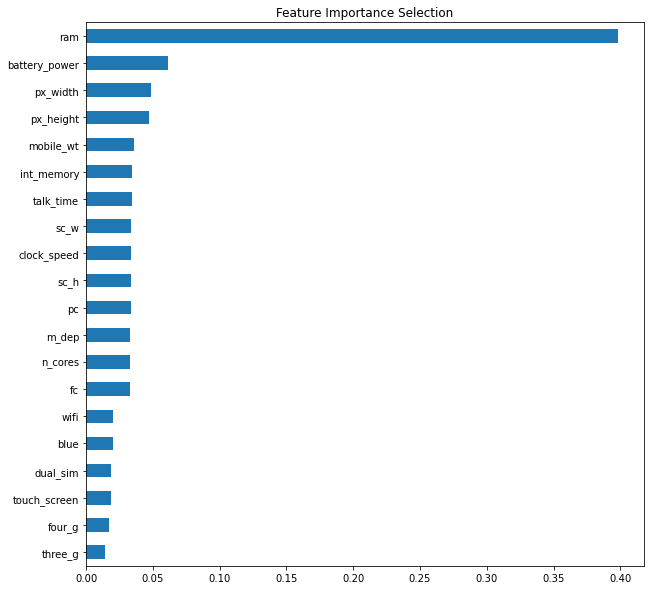

In [17]:
scores_etc.sort_values().plot(kind="barh", figsize=(10,10), title="Feature Importance Selection")

#### 3. Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable. Correlation can be positive (increase in value of a feature increases the value of the target variable) or negative (increase in value of a feature decreases the value of the target variable).

##### 3.1. Correlation of features with target variable

We select those features with higher correlation with target feature and drop others. However, since our target variable is categorical, this technique won't be applicable. If we are dealing with continuous target variable we can use this technique, so we will look at the pattern of codes.

In [18]:
mobile_corr=mobile.corr()
mobile_corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [19]:
mobile_corr.loc[(mobile_corr["price_range"] > 0.5) | (mobile_corr["price_range"] < -0.5), "price_range"]

ram            0.917046
price_range    1.000000
Name: price_range, dtype: float64

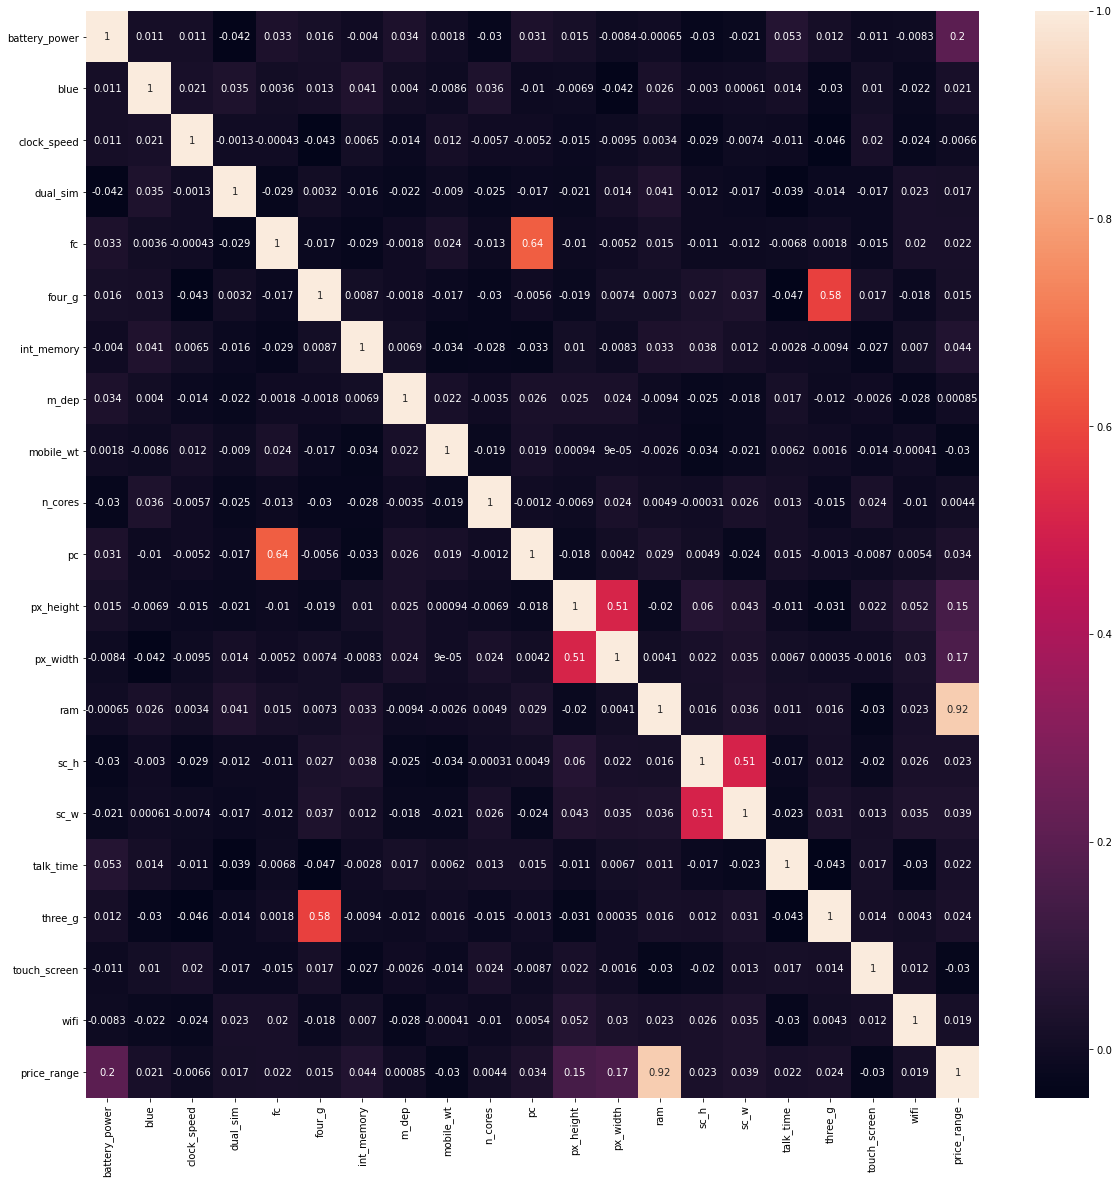

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(mobile.corr(), annot=True)

##### 3.2. Correlation among independent features

Among the features that are highly correlated with one another, we keep one and drop others. If two features are highly correlated, our model won't gain much information by keeping both of them and will take longer to train. So it is better to drop one. Similarly, if one feature is capable of representing three different features, we can drop two.

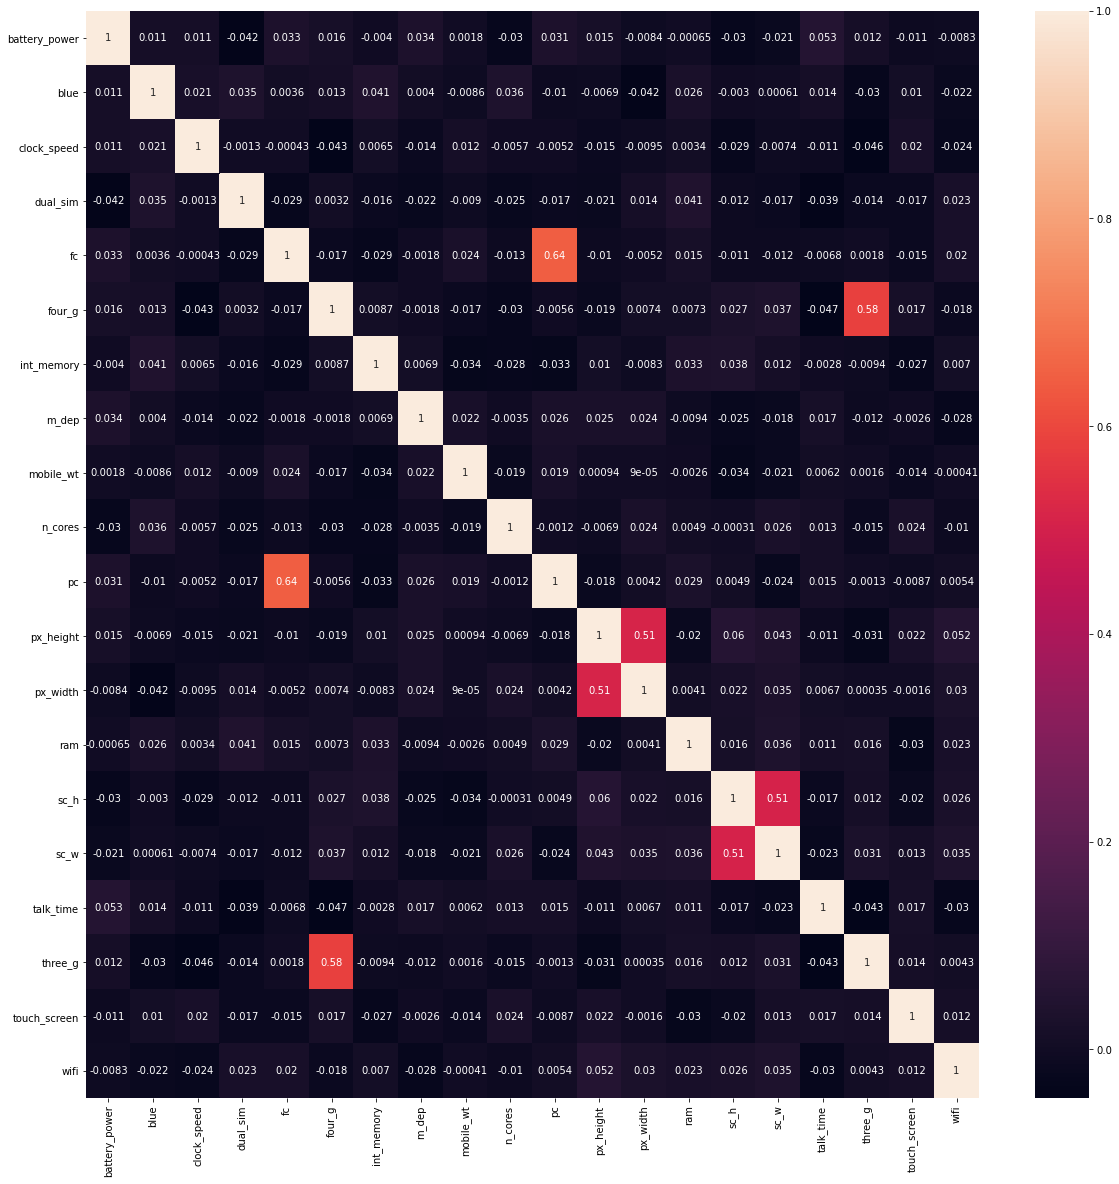

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), annot=True)

In [22]:
# find highly correlated features
def highly_correlated(df, threshold):
    corr_features = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    l = corr_matrix.shape[0]
    for i in range(l):
        for j in range(l):
            # we are interested in absolute coeff value
            if (abs(corr_matrix.iloc[i, j]) > threshold) & (i!=j): 
                colname = corr_matrix.columns[i]
                # getting the name of column
                corr_features.add(colname)
    print("check the following columns for highly correlated features")
    return corr_features

We will call the funtion we created using independent features and some threshold.

In [23]:
highly_correlated(X, 0.6)

check the following columns for highly correlated features


{'fc', 'pc'}

If a correlation threshold of 0.6 is sufficient for determining if two features are correlated we will keep one among "fc" and "pc", and drop one.

#### 4. Information Gain

Information gain calculates the reduction in entropy or surprise from transforming a dataset in some way.

It is commonly used in the construction of decision trees from a training dataset, by evaluating the information gain for each variable, and selecting the variable that maximizes the information gain, which in turn minimizes the entropy and best splits the dataset into groups for effective classification.

Information gain can also be used for feature selection, by evaluating the gain of each variable in the context of the target variable. In this slightly different usage, the calculation is referred to as mutual information between the two random variables.

In [24]:
#import
from sklearn.feature_selection import mutual_info_classif

In [25]:
#instantiate and fit
ig=mutual_info_classif(X,y)
ig

array([3.01558439e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.30301234e-02, 7.36519998e-03,
       6.37193579e-03, 0.00000000e+00, 0.00000000e+00, 2.34940120e-02,
       2.95577787e-02, 8.48710380e-01, 0.00000000e+00, 1.56289452e-02,
       0.00000000e+00, 0.00000000e+00, 1.49399566e-04, 0.00000000e+00])

In [26]:
scores_ig=pd.Series(ig, index=X.columns, name="scores_ig")
scores_ig.sort_values(ascending=False)

ram              0.848710
battery_power    0.030156
px_width         0.029558
px_height        0.023494
sc_w             0.015629
int_memory       0.013030
m_dep            0.007365
mobile_wt        0.006372
touch_screen     0.000149
four_g           0.000000
blue             0.000000
clock_speed      0.000000
dual_sim         0.000000
fc               0.000000
wifi             0.000000
pc               0.000000
sc_h             0.000000
talk_time        0.000000
three_g          0.000000
n_cores          0.000000
Name: scores_ig, dtype: float64

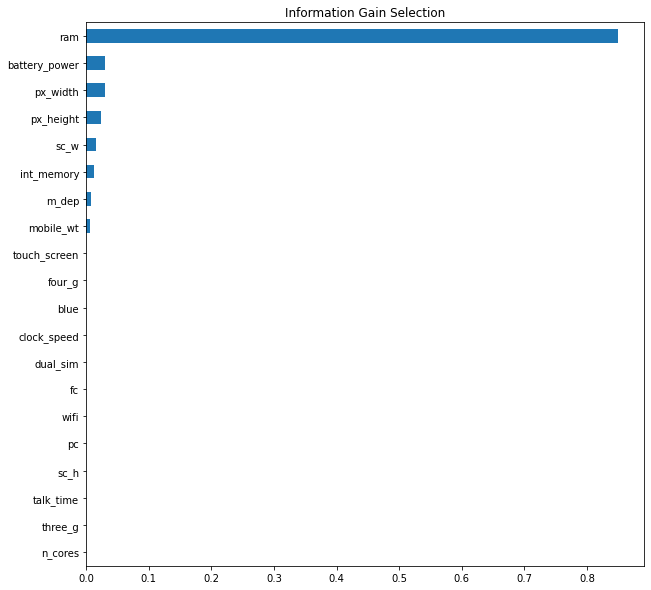

In [27]:
scores_ig.sort_values().plot(kind="barh", figsize=(10,10), title="Information Gain Selection")